## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_data = pd.merge(mouse_metadata,study_results,on="Mouse ID",how="outer")
# Display the data table for preview
merged_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
mice_count_unique = merged_data["Mouse ID"].nunique()
mice_count_unique

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_count = merged_data["Mouse ID"].count()
mice_count

1893

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_data.drop_duplicates(['Mouse ID','Timepoint'])
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_df_unique = clean_df["Mouse ID"].nunique()
clean_df_unique

249

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_regimen_group = clean_df.groupby(["Drug Regimen"])
tumor_vol_mean = drug_regimen_group["Tumor Volume (mm3)"].mean()
tumor_vol_median = drug_regimen_group["Tumor Volume (mm3)"].median()
tumor_vol_var = drug_regimen_group["Tumor Volume (mm3)"].var()
tumor_vol_sem = drug_regimen_group["Tumor Volume (mm3)"].sem()
tumor_vol_std = drug_regimen_group["Tumor Volume (mm3)"].std()

summary = pd.DataFrame({
    "Mean":tumor_vol_mean,
    "Median":tumor_vol_median,
    "Variance":tumor_vol_var,
    "Standard Deviation":tumor_vol_std,
    "Standard Error":tumor_vol_sem
})

summary
# This method is the most straighforward, creating multiple series and putting them all together at the end.

,Mean,Median,Variance,Standard Deviation,Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
summary_table = drug_regimen_group["Tumor Volume (mm3)"].describe()
summary_table_df = summary_table.reset_index()
summary_table_df

,Drug Regimen,count,mean,std,min,25%,50%,75%,max
0,Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209
1,Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185
2,Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731
3,Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014
4,Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817
5,Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939
6,Propriva,156.0,52.393463,6.568014,45.000000,47.046068,50.909965,56.491585,72.455421
7,Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816
8,Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690
9,Zoniferol,182.0,53.236507,6.966589,45.000000,47.337876,51.818479,57.954259,73.324432


## Bar and Pie Charts

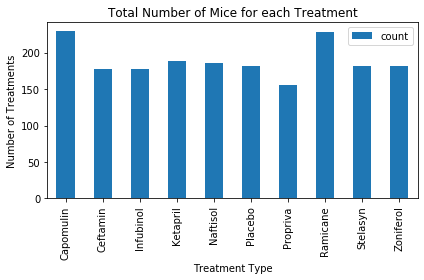

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
summary_table_df_2 = summary_table_df[["Drug Regimen","count"]]
summary_table_df_2 = summary_table_df_2.set_index("Drug Regimen")
summary_table_df_2.plot(kind="bar")
plt.title("Total Number of Mice for each Treatment")
plt.xlabel("Treatment Type")
plt.ylabel("Number of Treatments")
plt.tight_layout()

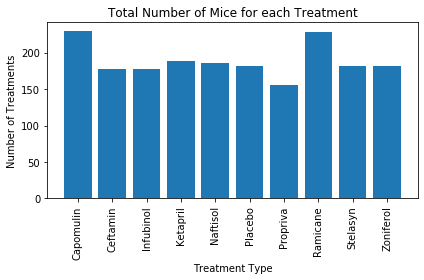

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x_axis = np.arange(len(summary_table))
plt.bar(x_axis,summary_table_df["count"])
plt.xticks(x_axis,summary_table_df.iloc[:,0],rotation="vertical")
plt.title("Total Number of Mice for each Treatment")
plt.ylabel("Number of Treatments")
plt.xlabel("Treatment Type")
plt.tight_layout()
plt.show()

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_dist = clean_df["Sex"].value_counts()
labels = ["Male","Female"]
explode = (0.1, 0)

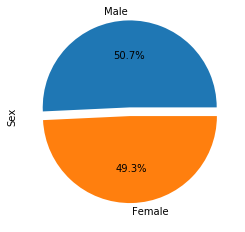

In [13]:
gender_dist.plot(kind="pie",explode=explode,labels=labels,autopct="%1.1f%%")

([<matplotlib.patches.Wedge at 0x284f71d7c08>,
 [Text(-0.027952249139820803, 1.1996744023975945, 'Male'),
  Text(0.025622792083347525, -1.099701537930112, 'Female')],
 [Text(-0.016305478664895467, 0.6998100680652635, '50.7%'),
  Text(0.01397606840909865, -0.5998372025073339, '49.3%')])

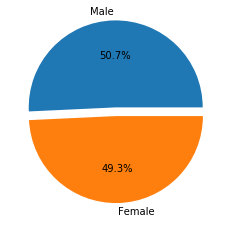

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_dist,explode=explode,labels=labels,autopct="%1.1f%%")

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Calculating the final tumor volume for each mouse for Capomulin
capomulin = clean_df.loc[clean_df['Drug Regimen'] == "Capomulin"]
capomulin_group = capomulin.groupby(["Mouse ID"])
capomulin_final_vol = capomulin_group["Tumor Volume (mm3)"].max()
capomulin_final_vol

Mouse ID
b128    45.651331
b742    45.000000
f966    45.000000
g288    46.304003
g316    46.809225
i557    47.685963
i738    45.595685
j119    48.158209
j246    46.408361
l509    48.070452
l897    46.154737
m601    45.000000
m957    46.414518
r157    46.539206
r554    45.781746
r944    47.373423
s185    45.000000
s710    45.000000
t565    46.749006
u364    47.212200
v923    45.704434
w150    45.000000
w914    45.893720
x401    45.473753
y793    45.000000
Name: Tumor Volume (mm3), dtype: float64

In [16]:
# Calculating the final tumor volume for each mouse for Ceftamin
ceftamin = clean_df.loc[clean_df['Drug Regimen'] == "Ceftamin"]
ceftamin_group = ceftamin.groupby(["Mouse ID"])
ceftamin_final_vol = ceftamin_group["Tumor Volume (mm3)"].max()
ceftamin_final_vol

Mouse ID
a275    62.999356
b447    45.000000
b487    56.057749
b759    55.742829
f436    48.722078
h531    47.784682
j296    61.849023
k210    68.923185
l471    67.748662
l490    57.918381
l558    46.784535
l661    59.851956
l733    64.299830
o287    59.741901
p438    61.433892
q483    64.192341
t573    45.000000
u149    52.925348
u153    45.000000
w151    67.527482
x226    45.000000
x581    64.634949
x822    61.386660
y769    68.594745
y865    64.729837
Name: Tumor Volume (mm3), dtype: float64

In [17]:
# Calculating the final tumor volume for each mouse for Ramicane
ramicane = clean_df.loc[clean_df['Drug Regimen'] == "Ramicane"]
ramicane_group = ramicane.groupby(["Mouse ID"])
ramicane_total_vol = ramicane_group["Tumor Volume (mm3)"].max()
ramicane_total_vol

Mouse ID
a411    45.466677
a444    45.000000
a520    45.000000
a644    46.910892
c458    45.722279
c758    46.940945
d251    45.000000
e662    46.409084
g791    45.851531
i177    45.000000
i334    45.000000
j913    45.252534
j989    46.343832
k403    45.000000
m546    45.000000
n364    45.521875
q597    45.766111
q610    46.585433
r811    45.625802
r921    45.568211
s508    45.000000
u196    47.622816
w678    45.000000
y449    46.378092
z578    45.000000
Name: Tumor Volume (mm3), dtype: float64

In [18]:
# Calculating the final tumor volume for each mouse for Infubinol
infubinol = clean_df.loc[clean_df['Drug Regimen'] == "Infubinol"]
infubinol_group = infubinol.groupby(["Mouse ID"])
infubinol_final_vol = infubinol_group["Tumor Volume (mm3)"].max()
infubinol_final_vol

Mouse ID
a203    67.973419
a251    65.525743
a577    57.031862
a685    66.083066
c139    72.226731
c326    45.000000
c895    60.969711
e476    62.435404
f345    60.918767
i386    67.289621
k483    66.196912
k804    62.117279
m756    47.010364
n671    60.165180
o809    55.629428
o813    45.699331
q132    54.656549
s121    55.650681
v339    46.250112
v719    54.048608
v766    51.542431
w193    50.005138
w584    58.268442
y163    67.685569
z581    62.754451
Name: Tumor Volume (mm3), dtype: float64

In [54]:
# Creating dataframe for final tumor volumes for each drug treatment
final_tumor_vol = pd.merge(capomulin_final_vol,ramicane_total_vol,on="Mouse ID",how="outer")
final_tumor_vol = final_tumor_vol.rename(columns={
    "Tumor Volume (mm3)_x":"capomulin_final_vol",
    "Tumor Volume (mm3)_y":"ramicane_final_vol"
})
final_tumor_vol = pd.merge(final_tumor_vol,ceftamin_final_vol,on="Mouse ID",how="outer")
final_tumor_vol = final_tumor_vol.rename(columns={
    "Tumor Volume (mm3)":"ceftamin_final_vol"
})
final_tumor_vol = pd.merge(final_tumor_vol,infubinol_final_vol,on="Mouse ID",how="outer")
final_tumor_vol = final_tumor_vol.rename(columns={
    "Tumor Volume (mm3)":"infubinol_final_vol"
})
final_tumor_vol

,capomulin_final_vol,ramicane_final_vol,ceftamin_final_vol,infubinol_final_vol
Mouse ID,,,,
b128,45.651331,NaN,NaN,NaN
b742,45.000000,NaN,NaN,NaN
f966,45.000000,NaN,NaN,NaN
g288,46.304003,NaN,NaN,NaN
g316,46.809225,NaN,NaN,NaN
...,...,...,...,...
v766,NaN,NaN,NaN,51.542431
w193,NaN,NaN,NaN,50.005138
w584,NaN,NaN,NaN,58.268442


In [58]:
# Start by getting the last (greatest) timepoint for each mouse
capomulin_greatest_timepoint = capomulin_group["Timepoint"].max()
ramicane_greatest_timepoint = ramicane_group["Timepoint"].max()
infubinol_greatest_timepoint = infubinol_group["Timepoint"].max()
ceftamin_greatest_timepoint = ceftamin_group["Timepoint"].max()

# Merging greatest timepoints into a single df
greatest_timepoint_df = pd.merge(capomulin_greatest_timepoint,ramicane_greatest_timepoint,on='Mouse ID',how="outer")
greatest_timepoint_df = greatest_timepoint_df.rename(columns={"Timepoint_x":"capomulin_greatest_timepoint","Timepoint_y":"ramicane_greatest_timepoint"})
greatest_timepoint_df = pd.merge(greatest_timepoint_df,infubinol_greatest_timepoint,on='Mouse ID',how='outer')
greatest_timepoint_df = greatest_timepoint_df.rename(columns={"Timepoint":"infubinol_greatest_timepoint"})
greatest_timepoint_df = pd.merge(greatest_timepoint_df,ceftamin_greatest_timepoint,on='Mouse ID',how='outer')
greatest_timepoint_df = greatest_timepoint_df.rename(columns={"Timepoint":"ceftamin_greatest_timepoint"})

greatest_timepoint_df

,capomulin_greatest_timepoint,ramicane_greatest_timepoint,infubinol_greatest_timepoint,ceftamin_greatest_timepoint
Mouse ID,,,,
b128,45.0,NaN,NaN,NaN
b742,45.0,NaN,NaN,NaN
f966,20.0,NaN,NaN,NaN
g288,45.0,NaN,NaN,NaN
g316,45.0,NaN,NaN,NaN
...,...,...,...,...
x226,NaN,NaN,NaN,0.0
x581,NaN,NaN,NaN,45.0
x822,NaN,NaN,NaN,45.0


In [76]:
# Merging group df with the original dataframe to get the tumor volume at the last timepoint
final_tumor_vol_last_timepoint = pd.merge(greatest_timepoint_df,final_tumor_vol,on="Mouse ID",how="outer")
final_tumor_vol_last_timepoint_final = pd.merge(final_tumor_vol_last_timepoint,clean_df,on="Mouse ID",how="outer")
final_tumor_vol_last_timepoint_final.head(30)

,Mouse ID,capomulin_greatest_timepoint,ramicane_greatest_timepoint,infubinol_greatest_timepoint,ceftamin_greatest_timepoint,capomulin_final_vol,ramicane_final_vol,ceftamin_final_vol,infubinol_final_vol,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,45.0,NaN,NaN,NaN,45.651331,NaN,NaN,NaN,Capomulin,Female,9,22,0,45.000000,0
1,b128,45.0,NaN,NaN,NaN,45.651331,NaN,NaN,NaN,Capomulin,Female,9,22,5,45.651331,0
2,b128,45.0,NaN,NaN,NaN,45.651331,NaN,NaN,NaN,Capomulin,Female,9,22,10,43.270852,0
3,b128,45.0,NaN,NaN,NaN,45.651331,NaN,NaN,NaN,Capomulin,Female,9,22,15,43.784893,0
4,b128,45.0,NaN,NaN,NaN,45.651331,NaN,NaN,NaN,Capomulin,Female,9,22,20,42.731552,0
5,b128,45.0,NaN,NaN,NaN,45.651331,NaN,NaN,NaN,Capomulin,Female,9,22,25,43.262145,1
6,b128,45.0,NaN,NaN,NaN,45.651331,NaN,NaN,NaN,Capomulin,Female,9,22,30,40.605335,1
7,b128,45.0,NaN,NaN,NaN,45.651331,NaN,NaN,NaN,Capomulin,Female,9,22,35,37.967644,1
8,b128,45.0,NaN,NaN,NaN,45.651331,NaN,NaN,NaN,Capomulin,Female,9,22,40,38.379726,2
9,b128,45.0,NaN,NaN,NaN,45.651331,NaN,NaN,NaN,Capomulin,Female,9,22,45,38.982878,2


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)

# Create empty list to fill with tumor vol data (for plotting)

    # Calculate the IQR and quantitatively determine if there are any potential outliers.    

    # Locate the rows which contain mice on each drug and get the tumor volumes
  
    
    # add subset 
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

Text(0.5, 1.0, 'Mouse B128: Tumor Volume (mm3) over time treated with Capomulin')

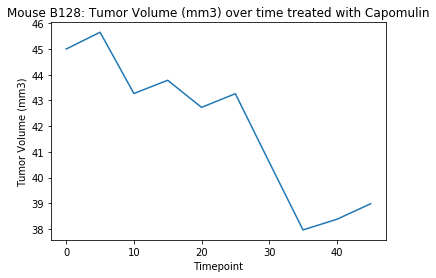

In [97]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mouse_b128 = final_tumor_vol_last_timepoint_final.loc[final_tumor_vol_last_timepoint_final['Mouse ID'] == 'b128']
timepoint_axis = mouse_b128['Timepoint']
mouse_b128_tumor_vol = mouse_b128['Tumor Volume (mm3)']
plt.plot(timepoint_axis,mouse_b128_tumor_vol)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse B128: Tumor Volume (mm3) over time treated with Capomulin")

In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
